<a href="https://colab.research.google.com/github/fredrikofstad/FL-Appliance-Energy-Prediction-and-Classification/blob/master/src/fl-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab for the FL-Appliance-Energy-Prediction-and-Classification repository found here: https://github.com/fredrikofstad/FL-Appliance-Energy-Prediction-and-Classification

First clone the repository and change the working directory:

In [1]:
#!git pull

In [1]:
!git clone https://github.com/fredrikofstad/FL-Appliance-Energy-Prediction-and-Classification

Cloning into 'FL-Appliance-Energy-Prediction-and-Classification'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 119 (delta 67), reused 77 (delta 56), pack-reused 14
Receiving objects: 100% (119/119), 73.84 MiB | 28.03 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [2]:
%cd /content/FL-Appliance-Energy-Prediction-and-Classification

/content/FL-Appliance-Energy-Prediction-and-Classification


Making sure gpus are connected:

In [3]:
%run src/test.py

Num GPUs Available:  0


Testing:

In [17]:
import tensorflow as tf
import tensorflow_federated as tff
import numpy as np

In [9]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
%tensorboard --logdir logs/fit

In [18]:
import collections

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

2023-11-04 18:47:23.318653: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-11-04 18:47:23.318789: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


b'Hello, World!'

In [19]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()


In [20]:
len(emnist_train.client_ids)

3383

In [21]:
emnist_train.element_type_structure

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [22]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

1

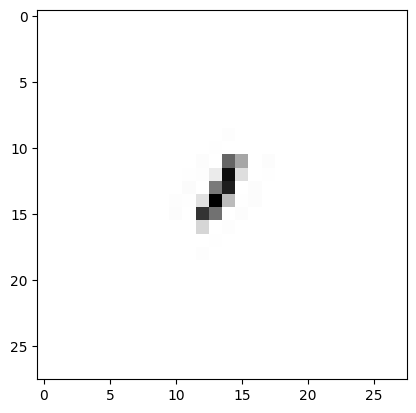

In [23]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()